In [1465]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [1466]:
df0=pd.read_csv("datasets/airlinereviews128k.csv", parse_dates=['DateFlown'])

In [1467]:
pd.set_option('display.max_columns', None)

In [1468]:
df0.sample()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Review,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
36542,Boeing 767,Condor Airlines,Economy Class,2015-08-01,5th August 2015,4,4,5,UnitedStates,8.0,yes,Flew non-stop Frankfurt to Minneapolis in econ...,FRA to MSP,3,5,condor-airlines,Condor Airlines customer review,Family Leisure,NaN,5,0,079fb74d-a524-4718-b6a5-ba1d2b0ced96


In [1469]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Aircraft             36423 non-null   object        
 1   AirlineName          129455 non-null  object        
 2   CabinType            126437 non-null  object        
 3   DateFlown            90993 non-null   datetime64[ns]
 4   DatePub              129455 non-null  object        
 5   EntertainmentRating  129455 non-null  int64         
 6   FoodRating           129455 non-null  int64         
 7   GroundServiceRating  129455 non-null  int64         
 8   OriginCountry        127777 non-null  object        
 9   OverallScore         125124 non-null  float64       
 10  Recommended          129455 non-null  object        
 11  Review               128631 non-null  object        
 12  Route                90825 non-null   object        
 13  SeatComfortRat

## EDA

In [1470]:
#pass names to uppercase (to differentiate better)
df0.columns = [x.upper() for x in df0.columns]

In [1471]:
#keep only dataset with Review values and Title of Reviews
df0=df0.dropna(subset="REVIEW") #too complicated to impute
df0=df0.dropna(subset="TITLE") #too complicated to impute
df0.reset_index(drop=True, inplace=True)

In [1472]:
df0.ROUTE.unique() #probably transform it later for origin and destiny

array(['Moroni to Moheli', 'Moroni to Anjouan', 'Anjouan to Dzaoudzi',
       ..., 'Budapest to Göteborg', 'London to Burgas',
       'Paris Beauvais to Riga'], dtype=object)

In [1473]:
#keep only dataset with Aircraft values
#df0=df0.dropna(subset="AIRCRAFT")

In [1474]:
#clean the tripverified variable
df0.TRIPVERIFIED.value_counts()

TRIPVERIFIED
Trip Verified                                45311
Not Verified                                 13755
NotVerified                                      9
Trip Verified,Trip Verified                      1
Chicago to Colorado Springs. Not Verified        1
Name: count, dtype: int64

In [1475]:
df0["TRIPVERIFIED"].replace("Trip Verified,Trip Verified","Trip Verified ", inplace=True)
df0["TRIPVERIFIED"].replace("NotVerified","Not Verified ", inplace=True)
df0["TRIPVERIFIED"].replace("Not Verified,Not Verified","Not Verified ", inplace=True)
df0["TRIPVERIFIED"].replace("Chicago to Colorado Springs. Not Verified","Not Verified ", inplace=True)

df0["TRIPVERIFIED"]=df0.TRIPVERIFIED.str.strip()

In [1476]:
#check time horizon to see if enough for time series
print(df0["DATEPUB"].min())
print(df0["DATEPUB"].max())

#ok

10th April 2005
9th September 2022


In [1477]:
df0.drop_duplicates()
df0.shape #no duplicates

(128627, 22)

In [1478]:
df0.describe()

,DATEFLOWN,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SEATCOMFORTRATING,SERVICERATING,VALUERATING,WIFIRATING
count,90166,128627.000000,128627.000000,128627.000000,124297.000000,128627.000000,128627.000000,128627.000000,128627.000000
mean,2018-12-26 22:17:51.144333568,1.559260,1.991557,1.648464,4.563103,2.471518,2.690602,2.639780,0.453132
min,2012-04-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2018-11-01 00:00:00,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,0.000000
75%,2020-11-01 00:00:00,3.000000,4.000000,3.000000,8.000000,4.000000,4.000000,4.000000,0.000000
max,2023-05-01 00:00:00,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000,5.000000
std,NaN,1.751718,1.774979,1.740740,3.499330,1.620989,1.775078,1.629001,1.077762


In [1479]:
from functions import nulls

In [1480]:
nulls(df0) #most under 3% so ok to impute. Check also if some variables have 0s where missing. So far: assumption that when no service, user set 0

,column_name,nulls_percentage
0,AIRCRAFT,0.718939
1,AIRLINENAME,0.000000
2,CABINTYPE,0.023455
3,DATEFLOWN,0.299012
4,DATEPUB,0.000000
5,ENTERTAINMENTRATING,0.000000
6,FOODRATING,0.000000
7,GROUNDSERVICERATING,0.000000
8,ORIGINCOUNTRY,0.013045
9,OVERALLSCORE,0.033663


Need for imputation:
- AIRCRAFT:won't be used so far, keep it like this for now
- TRAVELTYPE: drop values as I want to keep this var but too many missing to impute efficiently
- DATEFLOWN: ok, impute
- ROUTE: ok, impute
- CABINTYPE: ok, impute
- OVERALLSCORE: ok, impute

In [1481]:
#too many missing on traveltype but I want that variable so let's drop null values from it (still enough observ.)

df0=df0.dropna(subset="TRAVELTYPE")

In [1482]:
df0.DATEFLOWN.isna().sum() #ok

158

In [1483]:
pd.Timestamp.min


df0['DATEFLOWN']=pd.to_datetime(df0['DATEFLOWN'].fillna(pd.Timestamp.min))

In [1484]:
#impute using the most common route (mode)
df0['ROUTE'] = df0['ROUTE'].fillna(df0['ROUTE'].mode()[0])

In [1485]:
df0.ROUTE.isna().sum() #ok

0

In [1486]:
df0['CABINTYPE'] = df0['CABINTYPE'].fillna(df0['CABINTYPE'].mode()[0])

In [1487]:
df0.CABINTYPE.isna().sum() #ok

0

In [1488]:
nulls(df0)

,column_name,nulls_percentage
0,AIRCRAFT,0.599763
1,AIRLINENAME,0.000000
2,CABINTYPE,0.000000
3,DATEFLOWN,0.000000
4,DATEPUB,0.000000
5,ENTERTAINMENTRATING,0.000000
6,FOODRATING,0.000000
7,GROUNDSERVICERATING,0.000000
8,ORIGINCOUNTRY,0.000000
9,OVERALLSCORE,0.000011


In [1489]:
df0.OVERALLSCORE.value_counts()

OVERALLSCORE
1.0     39008
2.0      9363
10.0     9012
9.0      7413
8.0      6775
3.0      5541
7.0      4459
4.0      3099
5.0      2964
6.0      2684
Name: count, dtype: int64

In [1490]:
df0['OVERALLSCORE']=df0.OVERALLSCORE.fillna(round(np.mean(df0.OVERALLSCORE))) 

In [1491]:
df0.OVERALLSCORE.isna().sum() #ok

0

In [1492]:
#TripVerified: assume that missing is 'not verified'

In [1493]:
df0['TRIPVERIFIED']=df0.TRIPVERIFIED.fillna("Not Verified") 

In [1494]:
df0.TRIPVERIFIED.isna().sum() #ok

0

In [1495]:
#for now, in the rating vars asumme that 0 is 0 and non missing (if no service, I put a 0)

In [1496]:
df0.reset_index(drop=True, inplace=True)

In [1497]:
df0.info()
#CLEAN DATASET!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90319 entries, 0 to 90318
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AIRCRAFT             36149 non-null  object        
 1   AIRLINENAME          90319 non-null  object        
 2   CABINTYPE            90319 non-null  object        
 3   DATEFLOWN            90319 non-null  datetime64[ns]
 4   DATEPUB              90319 non-null  object        
 5   ENTERTAINMENTRATING  90319 non-null  int64         
 6   FOODRATING           90319 non-null  int64         
 7   GROUNDSERVICERATING  90319 non-null  int64         
 8   ORIGINCOUNTRY        90319 non-null  object        
 9   OVERALLSCORE         90319 non-null  float64       
 10  RECOMMENDED          90319 non-null  object        
 11  REVIEW               90319 non-null  object        
 12  ROUTE                90319 non-null  object        
 13  SEATCOMFORTRATING    90319 non-

In [1498]:
df=df0.drop(columns="AIRCRAFT")

In [1499]:
df0.shape

(90319, 22)

In [1500]:
df.shape #CLEAN FINAL DATASET TO USE!

(90319, 21)

In [1501]:
##CHECK VALUES OF VARIABLES

In [1502]:
df.CABINTYPE.value_counts() #ok

CABINTYPE
Economy Class      74836
Business Class     10507
Premium Economy     3360
First Class         1616
Name: count, dtype: int64

In [1503]:
df.ENTERTAINMENTRATING.value_counts()

ENTERTAINMENTRATING
0    39937
1    19423
4     8641
3     8480
5     7984
2     5854
Name: count, dtype: int64

In [1504]:
df.FOODRATING.value_counts()

FOODRATING
0    26019
1    23418
5    10827
3    10675
4    10594
2     8786
Name: count, dtype: int64

In [1505]:
df.GROUNDSERVICERATING.value_counts()

GROUNDSERVICERATING
1    42006
5    15405
4    12225
3     9399
2     7759
0     3525
Name: count, dtype: int64

In [1506]:
df.OVERALLSCORE.value_counts()

OVERALLSCORE
1.0     39008
2.0      9363
10.0     9012
9.0      7413
8.0      6775
3.0      5541
7.0      4459
4.0      3100
5.0      2964
6.0      2684
Name: count, dtype: int64

In [1507]:
df.SEATCOMFORTRATING.value_counts()

SEATCOMFORTRATING
1    28506
3    15943
4    14855
2    12681
5    12141
0     6193
Name: count, dtype: int64

In [1508]:
df.SERVICERATING.value_counts()

SERVICERATING
1    26623
5    21438
4    12694
3    12484
2    10587
0     6493
Name: count, dtype: int64

In [1509]:
df.VALUERATING.value_counts()

VALUERATING
1    41477
5    17176
4    11373
2    10647
3     9632
0       14
Name: count, dtype: int64

In [1510]:
df.WIFIRATING.value_counts()

WIFIRATING
0    61095
1    17846
5     3137
3     3048
4     2612
2     2581
Name: count, dtype: int64

In [1511]:
df.TRAVELTYPE.value_counts()

TRAVELTYPE
Solo Leisure      32957
Couple Leisure    23611
Family Leisure    19703
Business          14048
Name: count, dtype: int64

In [1512]:
df.TRIPVERIFIED.value_counts()

TRIPVERIFIED
Trip Verified    45310
Not Verified     45009
Name: count, dtype: int64

In [1513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90319 entries, 0 to 90318
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AIRLINENAME          90319 non-null  object        
 1   CABINTYPE            90319 non-null  object        
 2   DATEFLOWN            90319 non-null  datetime64[ns]
 3   DATEPUB              90319 non-null  object        
 4   ENTERTAINMENTRATING  90319 non-null  int64         
 5   FOODRATING           90319 non-null  int64         
 6   GROUNDSERVICERATING  90319 non-null  int64         
 7   ORIGINCOUNTRY        90319 non-null  object        
 8   OVERALLSCORE         90319 non-null  float64       
 9   RECOMMENDED          90319 non-null  object        
 10  REVIEW               90319 non-null  object        
 11  ROUTE                90319 non-null  object        
 12  SEATCOMFORTRATING    90319 non-null  int64         
 13  SERVICERATING        90319 non-

## FEATURE ENGINEERING

In [1514]:
#Transform the travel type variable in two: type of traveller (solo, family, business) and purpose (leisure, business)

In [1515]:
travell_transf=df["TRAVELTYPE"].str.split(" ", expand=True)

In [1516]:
travell_transf.rename(columns={travell_transf.columns[0]: 'TRAVELLER'}, inplace=True)
travell_transf.rename(columns={travell_transf.columns[1]: 'PURPOSE'}, inplace=True)

In [1517]:
travell_transf.TRAVELLER.value_counts()

TRAVELLER
Solo        32957
Couple      23611
Family      19703
Business    14048
Name: count, dtype: int64

In [1518]:
travell_transf["PURPOSE"]=np.where(travell_transf['TRAVELLER']=="Business", "Bussiness",travell_transf.PURPOSE)

In [1519]:
travell_transf["TRAVELLER"]=np.where(travell_transf['TRAVELLER']=="Business", "Solo",travell_transf.TRAVELLER) #assume business is 'solo' in traveller_type

In [1520]:
df.columns.get_loc('TRAVELTYPE') 

16

In [1521]:
df = pd.concat([df.iloc[:, :17], travell_transf, df.iloc[:, 17:]], axis=1)

In [1522]:
df.drop(columns='TRAVELTYPE', inplace=True)

In [1523]:
df.RECOMMENDED.value_counts() #quite imbalanced. Need to balance it?

RECOMMENDED
no     59309
yes    31010
Name: count, dtype: int64

In [1524]:
df.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID
82378,WestJet Airlines,Economy Class,2020-04-01,11th June 2020,0,0,0,UnitedKingdom,1.0,no,So much ill will generated with the artificial...,Gatwick to Calgary,0,0,westjet,barriers put up to providing refunds,Family,Leisure,Trip Verified,1,0,6ee80344-0a0e-4863-b686-bcc42881b3c7


In [1525]:
#clean variable #ROUTE

In [1526]:
route_origin = df["ROUTE"].str.split(r"\bto\b", expand=True)

In [1527]:
route_origin.head()

,0,1,2,3,4
0,Moroni,Moheli,None,None,None
1,Moroni,Anjouan,None,None,None
2,Anjouan,Dzaoudzi,None,None,None
3,Milano,Olbia,None,None,None
4,Cascais,Bragança,None,None,None


In [1528]:
route_origin.reset_index(drop=True, inplace=True)

In [1529]:
route_origin.info() #will assume that other 'to' are not necessary (writing typos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90319 entries, 0 to 90318
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       90319 non-null  object
 1   1       90113 non-null  object
 2   2       57 non-null     object
 3   3       6 non-null      object
 4   4       1 non-null      object
dtypes: object(5)
memory usage: 3.4+ MB


In [1530]:
df.ROUTE.unique() #clearly origin and destiny separated by 'to'

array(['Moroni to Moheli', 'Moroni to Anjouan', 'Anjouan to Dzaoudzi',
       ..., 'Budapest to Göteborg', 'London to Burgas',
       'Paris Beauvais to Riga'], dtype=object)

In [1531]:
route_origin.reset_index(drop=True, inplace=True)

In [1532]:
df.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID
14865,American Airlines,Economy Class,2021-06-01,26th June 2021,0,2,1,UnitedStates,1.0,no,American Airlines is the worst company I perso...,Memphis to Puerta Vallarta,3,3,american-airlines,worst company I personally have ever dealt with,Family,Leisure,Not Verified,1,1,bae1562b-416b-4e07-a1d2-d3dfbe09be1b


In [1533]:
df.reset_index(drop=True, inplace=True) #important to reset index or won't fit the new variables with route

In [1534]:
df.columns.get_loc('ROUTE')

11

In [1535]:
df = pd.concat([df.iloc[:, :12], route_origin, df.iloc[:, 12:]], axis=1)

In [1536]:
pd.set_option('display.max_columns', None) #to check all columns when sampling the df

In [1537]:
df.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,0,1,2,3,4,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID
31271,Emirates,Economy Class,2018-03-01,8th May 2018,5,4,4,UnitedKingdom,3.0,no,Auckland to London via Dubai. First time to fl...,Auckland to London via Dubai,Auckland,London via Dubai,None,None,None,2,1,emirates,I was disappointed,Solo,Leisure,Trip Verified,4,4,39dc069f-f786-4329-84c0-087d7a7288d5


In [1538]:
df.drop(columns=df.columns[15], inplace=True) #3 times, to take the extra 'tos', we are goint to assume there is only a 'to'

In [1539]:
df.drop(columns=df.columns[15], inplace=True) 

In [1540]:
df.drop(columns=df.columns[14], inplace=True) 

In [1541]:
df.rename(columns={df.columns[12]: 'ORIGIN'}, inplace=True)
df.rename(columns={df.columns[13]: 'DESTINY'}, inplace=True)

In [1542]:
df.reset_index(drop=True, inplace=True)

In [1543]:
route_destiny = df["DESTINY"].str.split(r"\bvia\b", expand=True)

In [1544]:
route_destiny.sample() #if scale is 'none' this means no scale was done. 

,0,1,2
59339,London,Oslo,None


In [1545]:
route_destiny.rename(columns={route_destiny.columns[0]: 'DESTINY2'}, inplace=True)
route_destiny.rename(columns={route_destiny.columns[1]: 'SCALE'}, inplace=True)
route_destiny.rename(columns={route_destiny.columns[2]: 'scale2'}, inplace=True)

In [1546]:
route_destiny.scale2.value_counts() #very few, we assume only if scale or not

scale2
Paris          1
HKG            1
Mexico City    1
Name: count, dtype: int64

In [1547]:
route_destiny.drop(columns="scale2", inplace=True)

In [1548]:
route_destiny.reset_index(drop=True, inplace=True)

In [1549]:
df.columns.get_loc('DESTINY')

13

In [1550]:
df = pd.concat([df.iloc[:, :14], route_destiny, df.iloc[:, 14:]], axis=1)

In [1551]:
df.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,DESTINY2,SCALE,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID
80120,VietJet Air,Economy Class,2018-09-01,21st September 2018,0,0,1,India,1.0,no,Bangkok to Phuket. Vietjet Air is the most thi...,Bangkok to Phuket,Bangkok,Phuket,Phuket,None,1,1,vietjetair,third class airline,Family,Leisure,Trip Verified,1,0,927d1829-a94f-4934-ae66-6043cc7e63ea


In [1552]:
df.drop(columns="DESTINY", inplace=True)

In [1553]:
df.rename(columns={'DESTINY2':'DESTINY'}, inplace=True)

In [1554]:
df.reset_index(drop=True, inplace=True) 

In [1555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90319 entries, 0 to 90318
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AIRLINENAME          90319 non-null  object        
 1   CABINTYPE            90319 non-null  object        
 2   DATEFLOWN            90319 non-null  datetime64[ns]
 3   DATEPUB              90319 non-null  object        
 4   ENTERTAINMENTRATING  90319 non-null  int64         
 5   FOODRATING           90319 non-null  int64         
 6   GROUNDSERVICERATING  90319 non-null  int64         
 7   ORIGINCOUNTRY        90319 non-null  object        
 8   OVERALLSCORE         90319 non-null  float64       
 9   RECOMMENDED          90319 non-null  object        
 10  REVIEW               90319 non-null  object        
 11  ROUTE                90319 non-null  object        
 12  ORIGIN               90319 non-null  object        
 13  DESTINY              90113 non-

In [1556]:
df= df.dropna(axis=0, subset=['DESTINY']) # too complicated to clean and separate, so drop (only 37 values)

In [1557]:
#delete spaces before and after
df["ORIGIN"]=df.ORIGIN.str.strip()
df["DESTINY"]=df.DESTINY.str.strip()

In [1558]:
df.insert(15,'SCALE_YN',np.where(df['SCALE'].isna(), 0,1))

In [1559]:
df.drop(columns="SCALE", inplace=True)

In [1560]:
df.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID
31232,Etihad Airways,Economy Class,2018-02-01,13th February 2018,1,2,1,Germany,3.0,no,Dusseldorf to Ho Chi Minh City via Abu Dhabi. ...,Dusseldorf to Ho Chi Minh City via Abu Dhabi,Dusseldorf,Ho Chi Minh City,1,2,3,etihad-airways,disappointed with the attitude,Solo,Leisure,Trip Verified,2,1,9d9904cd-2b3a-48ba-a757-731f796e485d


## LOGIT MODEL

In [1561]:
from scipy.stats import chi2_contingency

In [1562]:
data_crosstab = pd.crosstab(df['RECOMMENDED'], df['PURPOSE'], margins = False)
data_crosstab 
chi2_contingency(data_crosstab, correction=False)

#most variables are correlated to the Y, except purpose. 

#STEPS
# Take purpose out from the analysis
# include one or some variables of the rating, as they are quite explanatory of the Y

Chi2ContingencyResult(statistic=0.3928124507897614, pvalue=0.5308247506708774, dof=1, expected_freq=array([[ 9207.64196065, 50016.35803935],
       [ 4802.35803935, 26086.64196065]]))

In [1563]:
df.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID
82919,Vueling Airlines,Economy Class,2017-10-01,30th October 2017,1,1,1,Netherlands,1.0,no,Horrible airline. Midflight the captain said a...,Amsterdam to London,Amsterdam,London,0,1,1,vueling-airlines,there was zero communication,Solo,Leisure,Not Verified,1,1,2aeb30e0-ceb4-4e07-b96f-67df491dedce


In [1564]:
df.columns

Index(['AIRLINENAME', 'CABINTYPE', 'DATEFLOWN', 'DATEPUB',
       'ENTERTAINMENTRATING', 'FOODRATING', 'GROUNDSERVICERATING',
       'ORIGINCOUNTRY', 'OVERALLSCORE', 'RECOMMENDED', 'REVIEW', 'ROUTE',
       'ORIGIN', 'DESTINY', 'SCALE_YN', 'SEATCOMFORTRATING', 'SERVICERATING',
       'SLUG', 'TITLE', 'TRAVELLER', 'PURPOSE', 'TRIPVERIFIED', 'VALUERATING',
       'WIFIRATING', 'UNIQUE_ID'],
      dtype='object')

In [1565]:
df.CABINTYPE.value_counts()

CABINTYPE
Economy Class      74682
Business Class     10468
Premium Economy     3353
First Class         1610
Name: count, dtype: int64

In [1566]:
#change categoricals string to categorical numbers 1=lowest class and 4=highest class
df['CABINTYPE']=np.where(df['CABINTYPE']=="Economy Class", 1,df.CABINTYPE)
df['CABINTYPE']=np.where(df['CABINTYPE']=="Premium Economy", 2,df.CABINTYPE)
df['CABINTYPE']=np.where(df['CABINTYPE']=="Business Class", 3,df.CABINTYPE) #in order to avoid such an inbalanced class (firstclass few n)
df['CABINTYPE']=np.where(df['CABINTYPE']=="First Class", 4,df.CABINTYPE)

In [1567]:
df.CABINTYPE.value_counts()

CABINTYPE
1    74682
3    10468
2     3353
4     1610
Name: count, dtype: int64

In [1568]:
#pass froms string to int
df["CABINTYPE"]=df["CABINTYPE"].astype(int)

In [1569]:
df.TRAVELLER.value_counts()

TRAVELLER
Solo      46871
Couple    23569
Family    19673
Name: count, dtype: int64

In [1570]:
#change the variable traveller to numeric (based on specific order)
df['TRAVELLER']=np.where(df['TRAVELLER']=="Solo", 1,df.TRAVELLER)
df['TRAVELLER']=np.where(df['TRAVELLER']=="Couple", 2,df.TRAVELLER)
df['TRAVELLER']=np.where(df['TRAVELLER']=="Family", 3,df.TRAVELLER)

In [1571]:
df.TRAVELLER.value_counts()

TRAVELLER
1    46871
2    23569
3    19673
Name: count, dtype: int64

In [1572]:
#pass froms string to int
df["TRAVELLER"]=df["TRAVELLER"].astype(int)

In [1573]:
df.TRIPVERIFIED.value_counts()

TRIPVERIFIED
Trip Verified    45259
Not Verified     44854
Name: count, dtype: int64

In [1574]:
df['TRIPVERIFIED']=np.where(df['TRIPVERIFIED']=="Trip Verified", 1,0)

In [1575]:
df.TRIPVERIFIED.value_counts()

TRIPVERIFIED
1    45259
0    44854
Name: count, dtype: int64

In [1576]:
df.RECOMMENDED.value_counts() #quite imbalanced...better check later balancing with SMOTE?

RECOMMENDED
no     59224
yes    30889
Name: count, dtype: int64

In [1577]:
df["RECOMMENDED"]=np.where(df["RECOMMENDED"]=="yes",1,0)

In [1578]:
checkmodel=df[["CABINTYPE", "TRAVELLER", "GROUNDSERVICERATING", "SEATCOMFORTRATING", "SERVICERATING", "SCALE_YN", "TRIPVERIFIED","RECOMMENDED"]]

<Axes: >

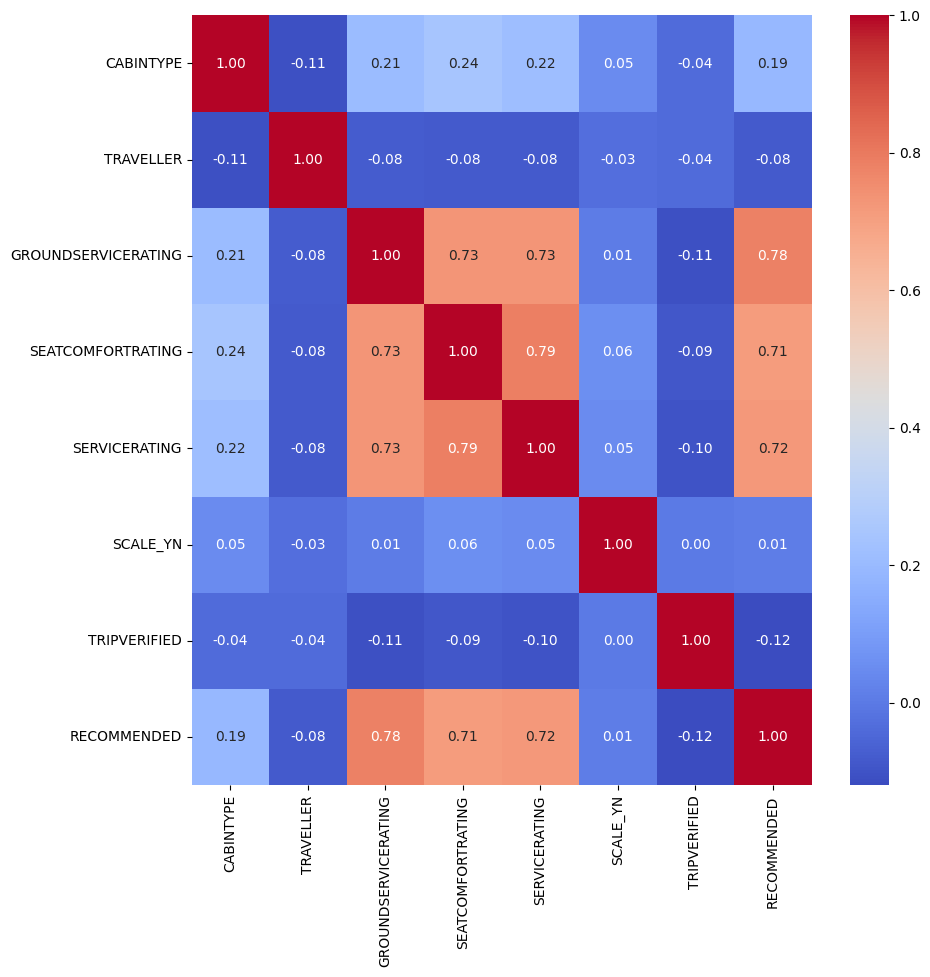

In [1579]:
#Check correlation (I know they are categorical, but just to take a look)
correlation_matrix=checkmodel.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f") #fmt es para definir el número de decimales

#some ratings feel quite correlated so let's try VIF

In [1580]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1581]:
#VIF
variables=checkmodel.copy()
vif_data=pd.DataFrame()
vif_data["Variable"]=variables.columns
vif_data["VIF"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
print(vif_data) #much better now! when we include the variables that are seat comfort, etc. total rate...the vif gfoes up!!

              Variable        VIF
0            CABINTYPE   3.648206
1            TRAVELLER   3.238071
2  GROUNDSERVICERATING   9.478207
3    SEATCOMFORTRATING  10.894672
4        SERVICERATING  10.753777
5             SCALE_YN   1.347026
6         TRIPVERIFIED   1.811426
7          RECOMMENDED   4.378354


In [1582]:
#avoid correlation by taking out some ratings. Ground service and seat comfort rating quite correlated to service rating. 

In [1583]:
checkmodel.drop(columns="SEATCOMFORTRATING", inplace=True)

In [1584]:
checkmodel.drop(columns="GROUNDSERVICERATING", inplace=True)

<Axes: >

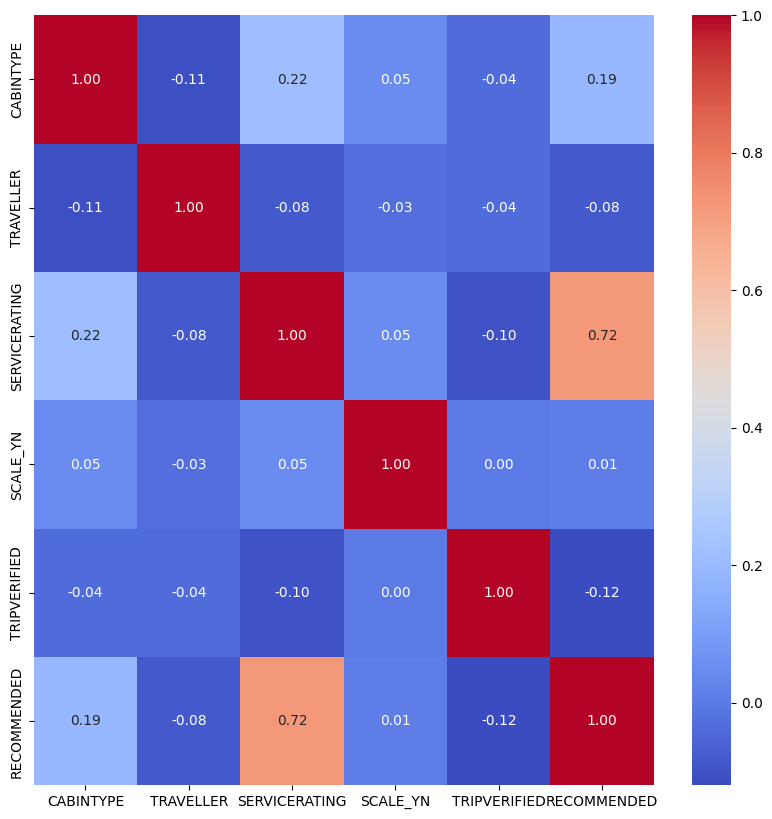

In [1585]:
#plot again
correlation_matrix=checkmodel.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f") #fmt es para definir el número de decimales

#ok to have 0.72 with dependant variable (explains it)

In [1586]:
#VIF
variables=checkmodel.copy()
vif_data=pd.DataFrame()
vif_data["Variable"]=variables.columns
vif_data["VIF"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
print(vif_data) #ok now

        Variable       VIF
0      CABINTYPE  3.442770
1      TRAVELLER  3.097988
2  SERVICERATING  6.334062
3       SCALE_YN  1.340184
4   TRIPVERIFIED  1.799015
5    RECOMMENDED  3.161864


In [1587]:
## LOGIT MODEL NOW

In [1588]:
dep=checkmodel[["RECOMMENDED"]] #dependant variable in the model
explicat=df[["CABINTYPE", "TRAVELLER", "GROUNDSERVICERATING", "SEATCOMFORTRATING", "SERVICERATING", "SCALE_YN", "TRIPVERIFIED"]]#explicative vars


#purpose was not included as it was not correlated to the Y variable --> no effect
#from ratings included those I considered relevant but not extremely correlated

In [1589]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [1590]:
X_train, X_test, y_train, y_test= train_test_split(explicat,dep, test_size=0.8, random_state=42)

In [1591]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [1592]:
model.score(X_test, y_test)

0.924983701155484

In [1593]:
from sklearn.metrics import confusion_matrix 
y_predicted=model.predict(X_test)
confusion_matrix(y_test, y_predicted)

array([[44960,  2495],
       [ 2913, 21723]], dtype=int64)

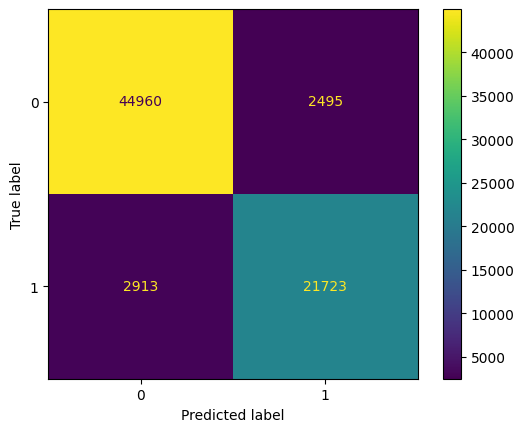

In [1594]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [1595]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     47455
           1       0.90      0.88      0.89     24636

    accuracy                           0.92     72091
   macro avg       0.92      0.91      0.92     72091
weighted avg       0.92      0.92      0.92     72091



In [1596]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


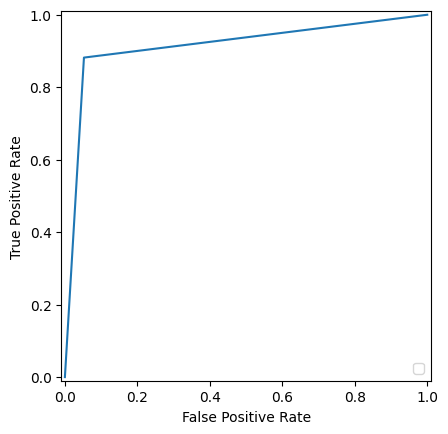

In [1597]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted) #y_test, y_test
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


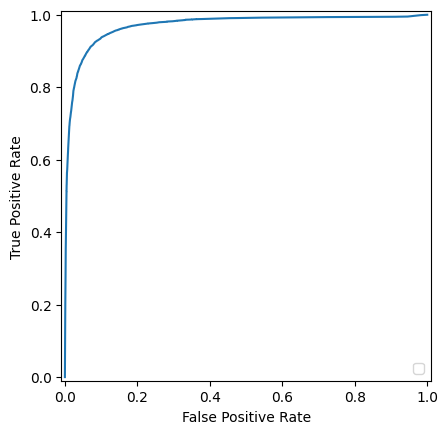

In [1598]:
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) #y_test, y_pred_probabilities
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

In [1599]:
#dependant variable (recommended) quite imbalance --> UPSAMPLING (SMOTE method)

In [1600]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [1601]:
y = dep
X = explicat
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

RECOMMENDED
0              59224
1              59224
Name: count, dtype: int64

In [1602]:
x_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm, test_size=0.2, stratify=y_sm, random_state=42)

In [1603]:
model=LogisticRegression(random_state=42)
model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [1604]:
model.score(X_test, y_test) 

0.9206838328408611

In [1605]:
from sklearn.metrics import confusion_matrix 
y_predicted=model.predict(X_test)
confusion_matrix(y_test, y_predicted)

array([[10862,   983],
       [  896, 10949]], dtype=int64)

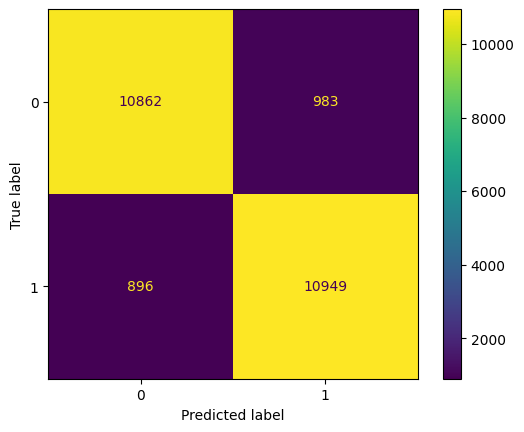

In [1606]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [1607]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11845
           1       0.92      0.92      0.92     11845

    accuracy                           0.92     23690
   macro avg       0.92      0.92      0.92     23690
weighted avg       0.92      0.92      0.92     23690



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


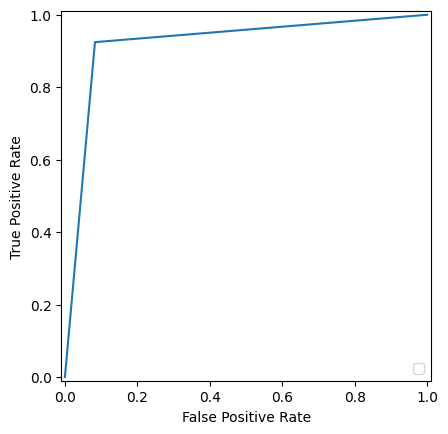

In [1608]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted) #y_test, y_test
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


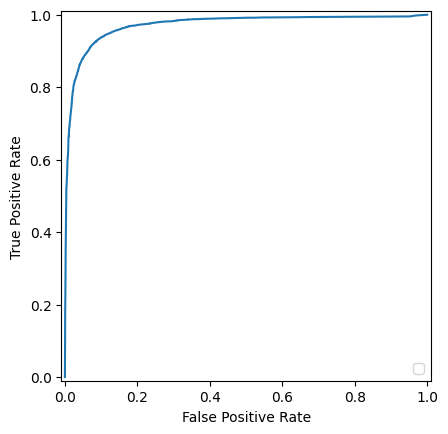

In [1609]:
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) #y_test, y_pred_probabilities
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

In [1610]:
model.coef_

array([[-0.05637974, -0.15316483,  1.00319799,  0.72217441,  0.73207705,
        -0.27461269, -0.54340482]])

In [1611]:
coeficients=model.coef_.tolist()[0]


In [1612]:
names=model.feature_names_in_.tolist()

In [1613]:
pd.DataFrame({"Names": names,
             "Coefficients": coeficients})


,Names,Coefficients
0,CABINTYPE,-0.056380
1,TRAVELLER,-0.153165
2,GROUNDSERVICERATING,1.003198
3,SEATCOMFORTRATING,0.722174
4,SERVICERATING,0.732077
5,SCALE_YN,-0.274613
6,TRIPVERIFIED,-0.543405


In [1614]:
#there is multicollinearity in Xs. Logit not good. So try a model that does not be influded by multicollinearity: KNN or Random Forest.

## KNN CLASSIFIER

In [1615]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [1616]:
#in knn essential to standarise in order to have same metrics therefore same distance between the values!
X_scaled = StandardScaler().fit_transform(X_sm)

# Now, all features will have the same weight.
pd.DataFrame(X_scaled).head()

,0,1,2,3,4,5,6
0,-0.468119,-0.844879,0.726474,0.743562,1.101874,-0.59736,1.04108
1,-0.468119,-0.844879,-1.040272,-0.516196,-0.635790,-0.59736,1.04108
2,-0.468119,-0.844879,-1.040272,-0.516196,-1.215011,-0.59736,1.04108
3,-0.468119,-0.844879,-1.040272,-1.146075,-0.056569,-0.59736,1.04108
4,-0.468119,-0.844879,1.315389,0.743562,0.522653,-0.59736,1.04108


In [1617]:
X_normalised = pd.DataFrame(X_scaled, columns = X_sm.columns)

In [1618]:
X_normalised.head()

,CABINTYPE,TRAVELLER,GROUNDSERVICERATING,SEATCOMFORTRATING,SERVICERATING,SCALE_YN,TRIPVERIFIED
0,-0.468119,-0.844879,0.726474,0.743562,1.101874,-0.59736,1.04108
1,-0.468119,-0.844879,-1.040272,-0.516196,-0.635790,-0.59736,1.04108
2,-0.468119,-0.844879,-1.040272,-0.516196,-1.215011,-0.59736,1.04108
3,-0.468119,-0.844879,-1.040272,-1.146075,-0.056569,-0.59736,1.04108
4,-0.468119,-0.844879,1.315389,0.743562,0.522653,-0.59736,1.04108


In [1619]:
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y_sm, test_size=0.2, stratify=y_sm, random_state=42)

# Initialize and train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn_model.fit(X_train, y_train)

# Evaluate the model
accuracy = knn_model.score(X_test, y_test)
print("Accuracy of KNN classifier:", accuracy)

Accuracy of KNN classifier: 0.9200928661882651


In [ ]:
#check for another number of neighbors

In [1620]:
metrics=["euclidean", "chebyshev", "manhattan"]
n=[3, 5, 7]
size=[0.1, 0.2, 0.3,  0.4]

In [1623]:
acc=0
for i in range(len(metrics)):
    for j in range(len(n)):
        for k in range(len(size)):
            X_train, X_test, y_train, y_test = train_test_split(X_normalised, y_sm, test_size=size[k], stratify=y_sm, random_state=42)
            knn_model = KNeighborsClassifier(n_neighbors=n[j], metric=metrics[i])
            knn_model.fit(X_train, y_train)
            accuracy = knn_model.score(X_test, y_test)
            print(f"Accuracy of KNN classifier with {size[k]} Test_size, with {n[j]} number of neighbours and using the {metrics[i]} method:", accuracy)
            if accuracy>acc:
                acc=accuracy

Accuracy of KNN classifier with 0.1 Test_size, with 3 number of neighbours and using the euclidean method: 0.913803292528493
Accuracy of KNN classifier with 0.2 Test_size, with 3 number of neighbours and using the euclidean method: 0.9140143520472773
Accuracy of KNN classifier with 0.3 Test_size, with 3 number of neighbours and using the euclidean method: 0.9137188687209793
Accuracy of KNN classifier with 0.4 Test_size, with 3 number of neighbours and using the euclidean method: 0.9109962009286618
Accuracy of KNN classifier with 0.1 Test_size, with 5 number of neighbours and using the euclidean method: 0.9212325875897003
Accuracy of KNN classifier with 0.2 Test_size, with 5 number of neighbours and using the euclidean method: 0.9200928661882651
Accuracy of KNN classifier with 0.3 Test_size, with 5 number of neighbours and using the euclidean method: 0.9188124384409737
Accuracy of KNN classifier with 0.4 Test_size, with 5 number of neighbours and using the euclidean method: 0.9169902912

In [1624]:
from sklearn.metrics import confusion_matrix 
y_predicted=knn_model.predict(X_test)
confusion_matrix(y_test, y_predicted)

array([[21728,  1962],
       [ 1897, 21793]], dtype=int64)

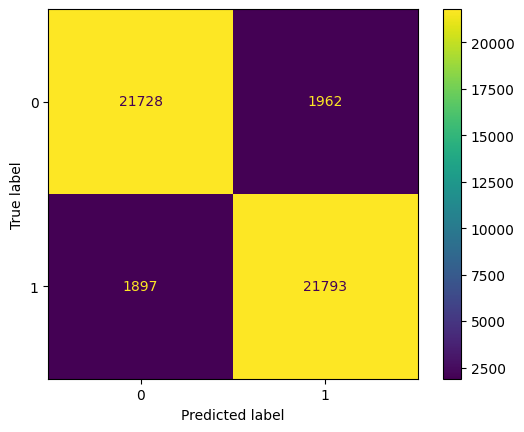

In [1625]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [1626]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     23690
           1       0.92      0.92      0.92     23690

    accuracy                           0.92     47380
   macro avg       0.92      0.92      0.92     47380
weighted avg       0.92      0.92      0.92     47380



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


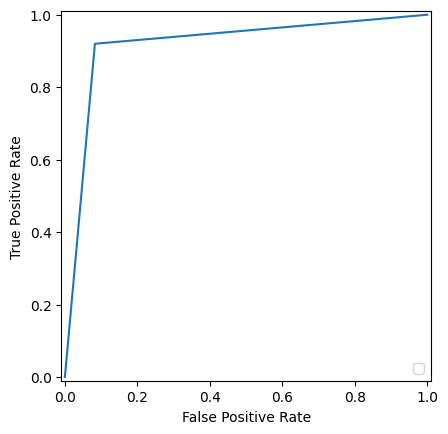

In [1627]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted) #y_test, y_test
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


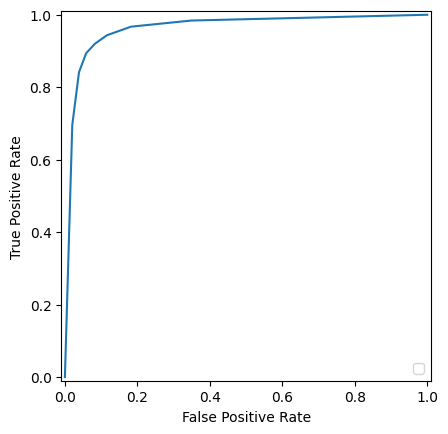

In [1628]:
y_pred_proba = knn_model.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) #y_test, y_pred_probabilities
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

In [1629]:
# Import grid search from sklearn
from sklearn.model_selection import GridSearchCV

# Define the parameters to test
parameters = {
    'n_neighbors' : range(1, 40),
    'weights': ['uniform', 'distance']
}

# Create grid search instance
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           return_train_score = True)

In [1630]:
# Fit the grid_search model on training data
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [1631]:
 grid_search.best_params_ #probar con menos vecinos

{'n_neighbors': 25, 'weights': 'distance'}

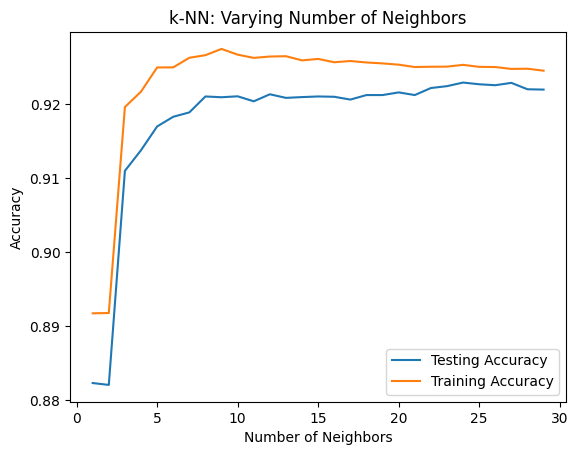

In [1633]:
no_neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [1634]:
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y_sm, test_size=0.2, stratify=y_sm, random_state=42)

# Initialize and train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=25, weights="distance")  # Using params from GridSearch
knn_model.fit(X_train, y_train)

# Evaluate the model
accuracy = knn_model.score(X_test, y_test)
print("Accuracy of KNN classifier:", accuracy)

#best result!!

Accuracy of KNN classifier: 0.9233431827775432


In [1635]:
from sklearn.metrics import confusion_matrix 
y_predicted=knn_model.predict(X_test)
confusion_matrix(y_test, y_predicted)

array([[11008,   837],
       [  979, 10866]], dtype=int64)

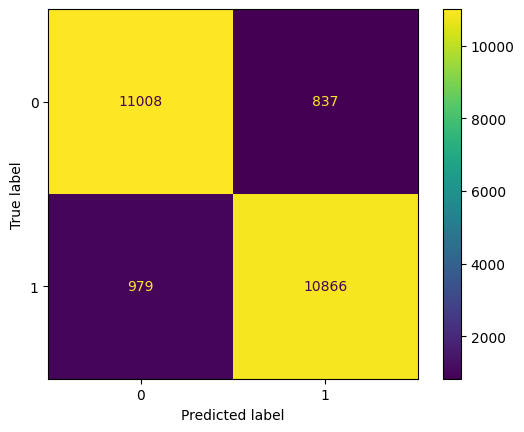

In [1636]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [1637]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     11845
           1       0.93      0.92      0.92     11845

    accuracy                           0.92     23690
   macro avg       0.92      0.92      0.92     23690
weighted avg       0.92      0.92      0.92     23690



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


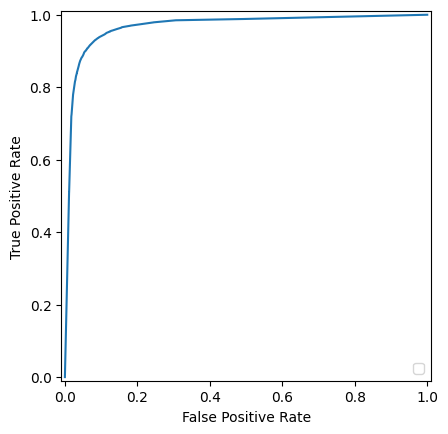

In [1638]:
y_pred_proba = knn_model.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) #y_test, y_pred_probabilities
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

## SENTIMENT ANALYSIS

In [262]:
#NOTE_ THIS IS DONE NOW BY TITLE REVIEW (quickest). It can also be done by body of review but then check why some +1 have low overall!

In [1639]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aida\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [1640]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aida\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1641]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [1767]:
df.TITLE.head()


0            pretty decent airline
1               Not a good airline
2     flight was fortunately short
3    impossible to check in online
4        the support was fantastic
Name: TITLE, dtype: object

In [1768]:
df.TITLE.tail()

90314    Wizz Air customer review
90315    Wizz Air customer review
90316    Wizz Air customer review
90317    Wizz Air customer review
90318    Wizz Air customer review
Name: TITLE, dtype: object

In [1769]:
df['TITLE'] = df["TITLE"].astype(str)

In [1770]:
df['TITLE']

0                pretty decent airline
1                   Not a good airline
2         flight was fortunately short
3        impossible to check in online
4            the support was fantastic
                     ...              
90314         Wizz Air customer review
90315         Wizz Air customer review
90316         Wizz Air customer review
90317         Wizz Air customer review
90318         Wizz Air customer review
Name: TITLE, Length: 90113, dtype: object

In [1771]:
df['TOKENIZREVIEW'] = df.apply(lambda row: nltk.word_tokenize(row['TITLE']), axis=1)

In [1772]:
df.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,TOKENIZREVIEW,filtered_tokens,stemmed_tokens,text,SENTIMENT
65874,SpiceJet,1,2020-06-01,19th June 2020,0,0,0,India,1.0,0,SpiceJet is the worst Airline. Once the paymen...,Delhi to Bagdogra,Delhi,Bagdogra,0,0,0,spicejet,the worst Airline,3,Leisure,0,1,0,ae3c3129-f6e7-4867-adee-448c95d8946b,"[the, worst, Airline]",SpiceJet worst Airline . Once payment done ' c...,spicejet worst airline . once payment done ' c...,spicejet worst . payment do ' care 's customer...,-1


In [1843]:
#include all values from airlines and countries to stop words (i.e. avoid neutrality)
airline_stopwords = set(df['AIRLINENAME'].values)
country_stopwords = set(df['ORIGINCOUNTRY'].values)

In [1844]:
airline_stopwords=list(airline_stopwords)
country_stopwords=list(country_stopwords)

In [1845]:
 import nltk
 nltk.download('stopwords')
 from nltk.corpus import stopwords
 #add new words to the list
 new_stopwords = ['and','I','A','And','So','arnt','This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these','customer service','service', 'customer', 'review', 'airline', 'airlines', 'flight', 'seat', 'seats',  'seat','customer review', "$", "#", "check-in", "check in"]
 stopwrd = nltk.corpus.stopwords.words('english')
 stopwrd.extend(new_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aida\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1846]:
stopwrd=stopwrd+airline_stopwords+country_stopwords

In [1848]:
df["filtered_tokens"] = df['TOKENIZREVIEW'] .apply(lambda x: ' '.join([word for word in x if word not in (stopwrd)]))

In [1849]:
df["filtered_tokens"]=df["filtered_tokens"].replace(',','', regex=True)

In [1850]:
ps=PorterStemmer()

In [1851]:
df["stemmed_tokens"]=[ps.stem(word)for word in df["filtered_tokens"] ]

In [1852]:
df["filtered_tokens"]

0                  pretty decent
1                       Not good
2              fortunately short
3        impossible check online
4              support fantastic
                  ...           
90314                   Wizz Air
90315                   Wizz Air
90316                   Wizz Air
90317                   Wizz Air
90318                   Wizz Air
Name: filtered_tokens, Length: 90113, dtype: object

In [1853]:
df["stemmed_tokens"]

0                    pretty dec
1                      not good
2             fortunately short
3        impossible check onlin
4               support fantast
                  ...          
90314                  wizz air
90315                  wizz air
90316                  wizz air
90317                  wizz air
90318                  wizz air
Name: stemmed_tokens, Length: 90113, dtype: object

In [1854]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aida\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1855]:
lemmatizer=WordNetLemmatizer()
lemmatized_tokens=[lemmatizer.lemmatize(token, pos="v") for token in df.filtered_tokens]
lemmatized_tokens

['pretty decent',
 'Not good',
 'fortunately short',
 'impossible check online',
 'support fantastic',
 'pilot nice',
 'fun unique retro-experience',
 'never fly Adria',
 'ruined last days holidays',
 'Had bad experience',
 'worse budget',
 'book another company',
 'combined two flights',
 'crew nice',
 'Very bad experience overall',
 'bad',
 'overall poor',
 'Would fly',
 'unpleasant experience',
 'Flight comfortable',
 'delayed 2 hours',
 'ashamed operations',
 'Two nice short flights',
 'extremely bad',
 'never fly',
 "ca n't remember delay",
 'quite comfortable',
 'nice comfortable flights',
 'great surprise',
 'value money experience',
 'fleet tired outdated',
 'underwhelming unimpressive',
 'different experiences',
 'staff pleasant enough',
 'Adria take criticism well',
 'Clean fresh aircraft',
 'job',
 'nice professional',
 'cabin staff rather absent',
 'never flying',
 'similar low cost',
 'happened last months',
 'friendly helpful staff',
 'onboard poor',
 'low cost',
 'staff 

In [1856]:

def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower()) #importante


    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwrd]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer() #como hay sólo 20k filas podemos lematizar. Si hay muchas...mejor steam

    lemmatized_tokens = [lemmatizer.lemmatize(token, pos="v") for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text



In [1857]:
df['text'] = df['TITLE'].apply(preprocess_text)


In [1858]:
sia=SentimentIntensityAnalyzer()

In [1917]:
def get_sentiment(text):
    scores=sia.polarity_scores(text)
    sentiment=1 if scores["compound"]>0.25 else (-1 if scores["compound"]<-0.25 else 0)
    return sentiment

In [1918]:
df["SENTIMENT"] =df["text"].apply(get_sentiment)

In [1919]:
df.RECOMMENDED.value_counts() 

RECOMMENDED
0    59224
1    30889
Name: count, dtype: int64

In [1921]:
df.SENTIMENT.value_counts()

SENTIMENT
 0    38396
 1    25996
-1    25721
Name: count, dtype: int64

In [1923]:
df[df.SENTIMENT==1].OVERALLSCORE.value_counts()

OVERALLSCORE
10.0    6637
9.0     5294
8.0     4510
1.0     3425
7.0     2350
2.0      998
6.0      949
3.0      694
5.0      630
4.0      509
Name: count, dtype: int64

In [1924]:
df[df.SENTIMENT==1].TITLE.value_counts()

TITLE
I was pleasantly surprised               85
not recommend this airline               59
service was excellent                    56
a great experience                       51
seats were comfortable                   50
                                         ..
improve service levels                    1
Emirates was amazing                      1
economy class was comfortable             1
one of the best airlines                  1
plane was comfortable, enough legroom     1
Name: count, Length: 20701, dtype: int64

In [1925]:
df[df.SENTIMENT==0].OVERALLSCORE.value_counts()

OVERALLSCORE
1.0     18917
2.0      4543
3.0      2765
10.0     2179
8.0      2002
9.0      1902
7.0      1732
4.0      1527
5.0      1524
6.0      1305
Name: count, dtype: int64

In [1926]:
df[df.SENTIMENT==0].TITLE.value_counts()

TITLE
Spirit Airlines customer review      274
British Airways customer review      177
United Airlines customer review      169
American Airlines customer review    149
never fly this airline again         128
                                    ... 
definitively fly again                 1
Never taking this airline again2       1
meals were barely enough               1
I have never had so much legroom       1
no information given                   1
Name: count, Length: 30511, dtype: int64

In [1927]:
df[df.SENTIMENT==-1].OVERALLSCORE.value_counts()

OVERALLSCORE
1.0     16621
2.0      3809
3.0      2072
4.0      1056
5.0       801
6.0       421
7.0       359
8.0       240
9.0       177
10.0      165
Name: count, dtype: int64

In [1928]:
df[df.SENTIMENT==-1].TITLE.value_counts()

TITLE
Terrible customer service          155
Worst experience ever              137
Worst airline ever                 133
worst customer service             104
Worst customer service             103
                                  ... 
a serious disappointment             1
unfriendly and abrupt                1
Etihad Airways was the worst         1
avoid them if possible               1
don't expect great friendliness      1
Name: count, Length: 18940, dtype: int64

DKFASLKFDJ


In [1870]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS # We will explain now the StopWord importation
from PIL import Image

In [1871]:
from nltk.corpus import stopwords

In [1872]:
#do this per airline

In [1873]:
df.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,TOKENIZREVIEW,filtered_tokens,stemmed_tokens,text,SENTIMENT
77500,Transavia,1,2019-09-01,25th September 2019,0,0,2,UnitedStates,2.0,0,Pisa to Amsterdam. I do not recommend this air...,Pisa to Amsterdam,Pisa,Amsterdam,0,3,4,transavia,book with a different airline,1,Leisure,0,1,0,d9390bef-3492-41c7-ba95-e94824e46610,"[book, with, a, different, airline]",book different,book differ,book different,0


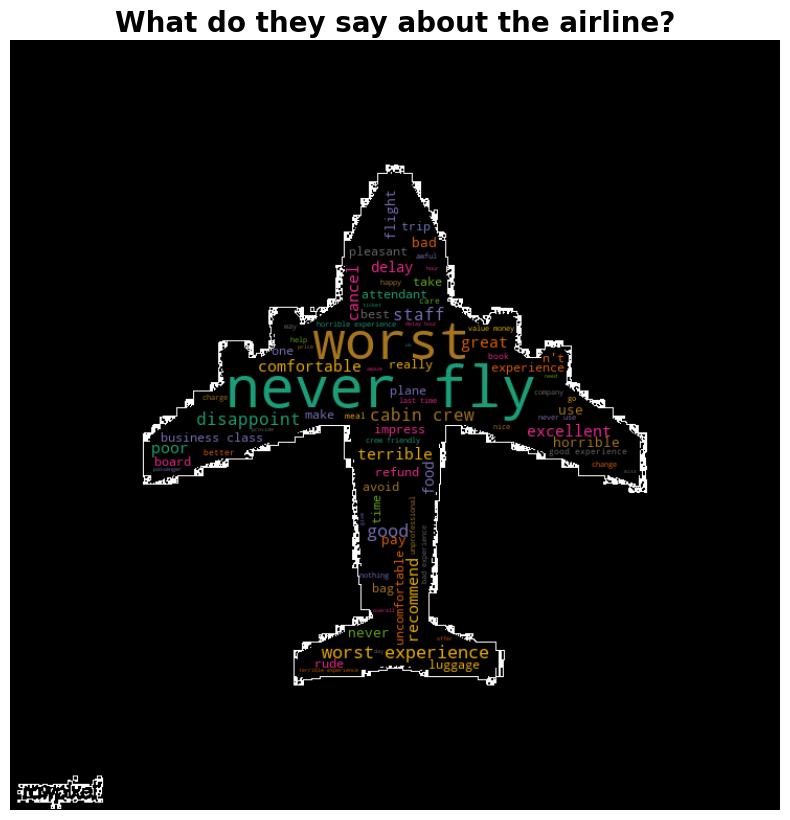

In [1874]:
planes=df["text"]
texto = " ".join(i for i in planes)
mask = np.array(Image.open("images/plane.png"))
stop_words = set(stopwords.words("english"))

#add words that aren't in the NLTK stopwords list
new_stopwords = ['customer service','service', 'customer', 'review', 'airline', 'flight', 'seat']
new_stopwords_list = stopwrd.extend(new_stopwords)
 
wordcloud = WordCloud(stopwords=new_stopwords_list, background_color="black", max_words=80, mask=mask, colormap="Dark2", contour_width=1, contour_color="white").generate(texto)
plt.figure( figsize=(10,10))
plt.title("What do they say about the airline?", weight="bold", size=20, color="black")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('images/plane_wc.png', bbox_inches='tight', dpi=300)
plt.show()

In [1804]:
aerolinea=df[df.AIRLINENAME=='Air Europa']

In [1805]:
aerolinea

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,TOKENIZREVIEW,filtered_tokens,stemmed_tokens,text,SENTIMENT
5537,Air Europa,3,2023-05-01,9th May 2023,0,2,1,UnitedStates,1.0,0,My wife and I flew Business Class and this is ...,Madrid to New York,Madrid,New York,0,4,2,air-europa,This airline isn’t competitive,2,Leisure,1,1,1,793d1d82-29f4-44d2-8429-ef76b76a89b8,"[This, airline, isn, ’, t, competitive]",’ competitive,’ competit,’ competitive,0
5538,Air Europa,3,2023-05-01,2nd May 2023,0,0,1,UnitedKingdom,1.0,0,Air Europa is probably the worst airline in Eu...,London to Madrid,London,Madrid,0,1,1,air-europa,Don't be scammed into booking with them,2,Leisure,0,1,0,1006ad3f-1ea6-478c-8ba4-76e5643167ab,"[Do, n't, be, scammed, into, booking, with, them]",Do n't scammed booking,do n't scammed book,n't scammed book,0
5539,Air Europa,1,2023-04-01,24th April 2023,1,1,1,UnitedStates,1.0,0,Worst customer service. Will never use again. ...,Madrid to Malaga,Madrid,Malaga,0,1,3,air-europa,our flight is closed for check in,3,Leisure,1,1,1,19a76001-9776-41f0-9fa5-b5f38060ad26,"[our, flight, is, closed, for, check, in]",closed check,closed check,close check,0
5540,Air Europa,3,2023-04-01,20th April 2023,1,1,1,UnitedStates,1.0,0,The worst airline on planet earth. That change...,Madrid to Mallaga,Madrid,Mallaga,0,1,1,air-europa,Air Europa customer review,1,Bussiness,0,1,1,6d2a050d-efe6-485b-92d6-545bf5bf83a5,"[Air, Europa, customer, review]",Air Europa,air europa,air europa,0
5541,Air Europa,1,2023-04-01,18th April 2023,1,1,1,Switzerland,1.0,0,I would begin with advising people not to use ...,"Zurich to Santa Cruz, Bolivia via Madrid",Zurich,"Santa Cruz, Bolivia",1,1,1,air-europa,this is the worst airline,1,Bussiness,1,1,0,b17ede1b-41c2-4d50-a9a9-b95de61956d9,"[this, is, the, worst, airline]",worst,worst,worst,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6547,Air Europa,1,2015-07-01,20th July 2015,0,0,5,Spain,8.0,1,Well organized boarding by seat rows and frien...,PMI to BCN,PMI,BCN,0,4,3,air-europa,Air Europa customer review,1,Bussiness,0,5,0,b8e8be46-6049-46ee-aabb-41fcc551d598,"[Air, Europa, customer, review]",Air Europa,air europa,air europa,0
6548,Air Europa,3,2015-07-01,17th July 2015,0,3,1,Canada,7.0,1,FCO to MAD. The flight was unmemorable from th...,Rome FCO to Madrid,Rome FCO,Madrid,0,4,4,air-europa,Air Europa customer review,3,Leisure,0,5,0,05162737-e36d-4dc2-aa12-8ea74241a31e,"[Air, Europa, customer, review]",Air Europa,air europa,air europa,0
6573,Air Europa,1,2015-07-01,14th July 2015,5,4,5,UnitedStates,10.0,1,I broke my foot on my vacation and the entire ...,Madrid to New York,Madrid,New York,0,5,5,air-europa,Air Europa customer review,1,Leisure,0,5,0,a8f22981-72f3-496e-8a9e-f2c4ba123e27,"[Air, Europa, customer, review]",Air Europa,air europa,air europa,0
6574,Air Europa,1,2015-06-01,5th July 2015,0,2,1,CzechRepublic,3.0,0,San Juan to Madrid was on time. No space for m...,PJU to MUC via MAD,PJU,MUC,1,1,3,air-europa,Air Europa customer review,2,Leisure,0,2,0,2d7cbb81-36c4-4943-84d3-c3f712c98228,"[Air, Europa, customer, review]",Air Europa,air europa,air europa,0


In [ ]:
for i in df.AIRLINENAME.unique():
    aerolinea=df[df.AIRLINENAME==i]
    planes=aerolinea["text"]
    texto = " ".join(i for i in planes)
    mask = np.array(Image.open("images/plane.png"))
    stop_words = set(stopwords.words("english"))

    #add words that aren't in the NLTK stopwords list
    new_stopwords = ['customer service','service', 'customer', 'review', 'airline', 'flight', 'seat']
    new_stopwords_list = stopwrd.extend(new_stopwords)
    
    wordcloud = WordCloud(stopwords=new_stopwords_list, background_color="black", max_words=200, mask=mask, colormap="Dark2", contour_width=1, contour_color="white").generate(texto)
    plt.figure( figsize=(10,10))
    plt.title("What do they say about the airline?", weight="bold", size=20, color="black")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(f'images/plane_{i}_wc.png', bbox_inches='tight', dpi=300)


In [339]:
#df0['OVERALLSCORE'] = np.where((df0['OVERALLSCORE'] ==1) & (df0['RECOMMENDED'] =="yes") , 10, df0['OVERALLSCORE']) DON´T DO THIS, FIRST EXPLORE

In [107]:
df0.rename(columns={'text':'SENTIMENT'}, inplace=True)

## FLIGHT RECOMMENDER

In [261]:
from sklearn.neighbors import NearestNeighbors

In [39]:
df0.columns

Index(['AIRCRAFT', 'AIRLINENAME', 'CABINTYPE', 'DATEFLOWN', 'DATEPUB',
       'ENTERTAINMENTRATING', 'FOODRATING', 'GROUNDSERVICERATING',
       'ORIGINCOUNTRY', 'OVERALLSCORE', 'RECOMMENDED', 'REVIEW', 'ROUTE',
       'SEATCOMFORTRATING', 'SERVICERATING', 'SLUG', 'TITLE', 'TRAVELLER',
       'PURPOSE', 'TRIPVERIFIED', 'VALUERATING', 'WIFIRATING', 'UNIQUE_ID'],
      dtype='object')

In [40]:
data=df0[["ENTERTAINMENTRATING", "FOODRATING", "GROUNDSERVICERATING", "OVERALLSCORE", "SEATCOMFORTRATING", "SERVICERATING", "VALUERATING", "WIFIRATING"]]

In [41]:
data.shape

(89989, 8)

In [159]:
X=data.drop(columns="OVERALLSCORE")
y=data.OVERALLSCORE

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el grid de parámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciar el modelo
rf = RandomForestRegressor()

# Configurar el GridSearch
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo
grid_search_rf.fit(X_train, y_train)

# Resultados
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Score: {grid_search_rf.best_score_}")
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Definir el grid de parámetros\nparam_grid_rf = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# Instanciar el modelo\nrf = RandomForestRegressor()\n\n# Configurar el GridSearch\ngrid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)\n\n# Ajustar el modelo\ngrid_search_rf.fit(X_train, y_train)\n\n# Resultados\nprint(f"Best Parameters: {grid_search_rf.best_params_}")\nprint(f"Best Score: {grid_search_rf.best_score_}")\n'

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
best_params={'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
modelrf=RandomForestRegressor(**best_params) #Keyword arguments (cada uno de los parámetros, me los coges como key y como values)
modelrf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=200)

In [164]:
my_flight_values = [3,5,8,1,5,6,10]

In [165]:
my_flight_df = pd.DataFrame(data=[my_flight_values], columns=X.columns)
print("You will have an Overall Review of: ", round(modelrf.predict(my_flight_df)[0],2), " using Random Forest!!!!!")

You will have an Overall Review of:  7.61  using Random Forest!!!!!


In [414]:
##RECOMMENDER ITSELF

In [415]:
len(df0.AIRLINENAME.unique())

514

In [416]:
df0.sample()

,AIRCRAFT,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SCALE,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID
76055,Boeing 777-300,Thai Airways,Economy Class,2017-02-01,19th March 2017,5,5,5,Denmark,9.0,yes,Copenhagen to Bangkok was my first flight with...,Copenhagen to Bangkok,Copenhagen,Bangkok,0,None,5,5,thai-airways,a very pleasant experience,Solo,Leisure,NaN,5,5,4cccb245-352b-4572-bb22-66b77ee28a8e


In [417]:
recommendator=df0.groupby("AIRLINENAME").mean(numeric_only=True)

In [418]:
recommendator=recommendator.round(2)

In [419]:
recommendator

,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,VALUERATING,WIFIRATING
AIRLINENAME,,,,,,,,,
AB Aviation,0.00,2.00,2.00,3.67,0.00,2.67,2.67,2.33,0.00
ANA All Nippon Airways,3.34,3.86,4.26,8.14,0.26,4.01,4.50,4.21,1.17
ASKY Airlines,0.59,1.35,1.59,2.29,0.24,1.82,1.65,1.35,0.24
ATA Airlines,0.00,1.50,1.50,1.50,0.00,1.00,1.50,2.00,0.00
Adria Airways,0.82,1.46,3.05,4.77,0.08,3.13,3.10,2.62,0.49
...,...,...,...,...,...,...,...,...,...
euroAtlantic Airways,1.33,2.00,1.67,2.13,0.07,1.40,1.93,1.47,0.67
fastjet,0.27,1.03,2.15,3.70,0.12,2.55,2.48,2.27,0.15
flyadeal,0.21,0.68,1.26,1.89,0.00,1.26,1.32,1.74,0.21


In [420]:
num=df0[["AIRLINENAME", "ENTERTAINMENTRATING", "FOODRATING", "GROUNDSERVICERATING", "OVERALLSCORE", "SEATCOMFORTRATING", "SERVICERATING", "VALUERATING", "WIFIRATING"]]

In [421]:
num=num.drop_duplicates(subset=['AIRLINENAME'])

In [422]:
num.reset_index(drop=True, inplace=True)

In [423]:
num.sample()

,AIRLINENAME,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SEATCOMFORTRATING,SERVICERATING,VALUERATING,WIFIRATING
477,US Airways,0,1,1,1.0,2,1,1,0


In [424]:
num.shape

(514, 9)

In [425]:
num.drop('AIRLINENAME', axis=1, inplace=True)

In [426]:
recommendator['AIRLINE']=recommendator.index

In [427]:
recommendator.sample()

,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,VALUERATING,WIFIRATING,AIRLINE
AIRLINENAME,,,,,,,,,,
Aigle Azur,0.38,0.38,1.62,2.0,0.0,1.62,1.38,1.5,0.0,Aigle Azur


In [428]:
num.shape

(514, 8)

In [429]:
df0.reset_index(drop=True, inplace=True)
num.reset_index(drop=True, inplace=True)

In [430]:
recommendator.OVERALLSCORE.value_counts()

OVERALLSCORE
1.00     26
10.00    11
8.00     10
5.00     10
4.00      9
         ..
4.30      1
1.82      1
5.36      1
8.14      1
3.07      1
Name: count, Length: 288, dtype: int64

In [431]:
recommendator.reset_index()

,AIRLINENAME,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,VALUERATING,WIFIRATING,AIRLINE
0,AB Aviation,0.00,2.00,2.00,3.67,0.00,2.67,2.67,2.33,0.00,AB Aviation
1,ANA All Nippon Airways,3.34,3.86,4.26,8.14,0.26,4.01,4.50,4.21,1.17,ANA All Nippon Airways
2,ASKY Airlines,0.59,1.35,1.59,2.29,0.24,1.82,1.65,1.35,0.24,ASKY Airlines
3,ATA Airlines,0.00,1.50,1.50,1.50,0.00,1.00,1.50,2.00,0.00,ATA Airlines
4,Adria Airways,0.82,1.46,3.05,4.77,0.08,3.13,3.10,2.62,0.49,Adria Airways
...,...,...,...,...,...,...,...,...,...,...,...
509,euroAtlantic Airways,1.33,2.00,1.67,2.13,0.07,1.40,1.93,1.47,0.67,euroAtlantic Airways
510,fastjet,0.27,1.03,2.15,3.70,0.12,2.55,2.48,2.27,0.15,fastjet
511,flyadeal,0.21,0.68,1.26,1.89,0.00,1.26,1.32,1.74,0.21,flyadeal
512,flybe,0.00,2.25,3.50,5.75,0.00,2.50,3.25,3.25,0.00,flybe


In [432]:
recommendator

,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,VALUERATING,WIFIRATING,AIRLINE
AIRLINENAME,,,,,,,,,,
AB Aviation,0.00,2.00,2.00,3.67,0.00,2.67,2.67,2.33,0.00,AB Aviation
ANA All Nippon Airways,3.34,3.86,4.26,8.14,0.26,4.01,4.50,4.21,1.17,ANA All Nippon Airways
ASKY Airlines,0.59,1.35,1.59,2.29,0.24,1.82,1.65,1.35,0.24,ASKY Airlines
ATA Airlines,0.00,1.50,1.50,1.50,0.00,1.00,1.50,2.00,0.00,ATA Airlines
Adria Airways,0.82,1.46,3.05,4.77,0.08,3.13,3.10,2.62,0.49,Adria Airways
...,...,...,...,...,...,...,...,...,...,...
euroAtlantic Airways,1.33,2.00,1.67,2.13,0.07,1.40,1.93,1.47,0.67,euroAtlantic Airways
fastjet,0.27,1.03,2.15,3.70,0.12,2.55,2.48,2.27,0.15,fastjet
flyadeal,0.21,0.68,1.26,1.89,0.00,1.26,1.32,1.74,0.21,flyadeal


In [433]:
num.sample()

,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SEATCOMFORTRATING,SERVICERATING,VALUERATING,WIFIRATING
202,1,1,2,3.0,5,2,2,1


In [434]:
recommendator.reset_index(drop=True, inplace=True)

In [435]:
recommendator

,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,VALUERATING,WIFIRATING,AIRLINE
0,0.00,2.00,2.00,3.67,0.00,2.67,2.67,2.33,0.00,AB Aviation
1,3.34,3.86,4.26,8.14,0.26,4.01,4.50,4.21,1.17,ANA All Nippon Airways
2,0.59,1.35,1.59,2.29,0.24,1.82,1.65,1.35,0.24,ASKY Airlines
3,0.00,1.50,1.50,1.50,0.00,1.00,1.50,2.00,0.00,ATA Airlines
4,0.82,1.46,3.05,4.77,0.08,3.13,3.10,2.62,0.49,Adria Airways
...,...,...,...,...,...,...,...,...,...,...
509,1.33,2.00,1.67,2.13,0.07,1.40,1.93,1.47,0.67,euroAtlantic Airways
510,0.27,1.03,2.15,3.70,0.12,2.55,2.48,2.27,0.15,fastjet
511,0.21,0.68,1.26,1.89,0.00,1.26,1.32,1.74,0.21,flyadeal
512,0.00,2.25,3.50,5.75,0.00,2.50,3.25,3.25,0.00,flybe


In [436]:
recommendator.AIRLINE

0                 AB Aviation
1      ANA All Nippon Airways
2               ASKY Airlines
3                ATA Airlines
4               Adria Airways
                ...          
509      euroAtlantic Airways
510                   fastjet
511                  flyadeal
512                     flybe
513                  flydubai
Name: AIRLINE, Length: 514, dtype: object

In [457]:
df1=df0.groupby(['AIRLINENAME'])['REVIEW'].count().reset_index()

In [458]:
df1.sort_values('REVIEW', ascending=False)

,AIRLINENAME,REVIEW
80,American Airlines,4884
410,Spirit Airlines,3953
468,United Airlines,3706
126,British Airways,2722
200,Frontier Airlines,2680
...,...,...
209,Grand Cru Airlines,1
189,Felix Airways,1
170,EWA Air,1
168,Dynamic International Airways,1


In [459]:
df1 = df1[df1['REVIEW'] > 100] 

In [460]:
df1.shape

(132, 2)

In [461]:
recommendator.reset_index(drop=True, inplace=True)

In [462]:
recommendator

,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,VALUERATING,WIFIRATING,AIRLINE
0,0.00,2.00,2.00,3.67,0.00,2.67,2.67,2.33,0.00,AB Aviation
1,3.34,3.86,4.26,8.14,0.26,4.01,4.50,4.21,1.17,ANA All Nippon Airways
2,0.59,1.35,1.59,2.29,0.24,1.82,1.65,1.35,0.24,ASKY Airlines
3,0.00,1.50,1.50,1.50,0.00,1.00,1.50,2.00,0.00,ATA Airlines
4,0.82,1.46,3.05,4.77,0.08,3.13,3.10,2.62,0.49,Adria Airways
...,...,...,...,...,...,...,...,...,...,...
509,1.33,2.00,1.67,2.13,0.07,1.40,1.93,1.47,0.67,euroAtlantic Airways
510,0.27,1.03,2.15,3.70,0.12,2.55,2.48,2.27,0.15,fastjet
511,0.21,0.68,1.26,1.89,0.00,1.26,1.32,1.74,0.21,flyadeal
512,0.00,2.25,3.50,5.75,0.00,2.50,3.25,3.25,0.00,flybe


In [403]:
def best_airline_recommender():
    
    user_input = input("You want to be recommended with airlines similar to: ",).lower()
    listado=[i.lower() for i in recommendator["AIRLINE"]]
    if user_input not in listado:
        return "No está"
    test_data = recommendator[recommendator["AIRLINE"] == user_input]
    
    num_input = num.loc[test_data.index].values
               
# Calculate similarities (n_neighbors=6 for 5 recommendations) - NOT CONFUSE NN to KNN
    search = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(num) # kd_tree, brute, auto...
    _ , queried_indices = search.kneighbors(num_input) #kneighbors returns two arrays: one containing the distances from the query point to each of its nearest neighbors (which we discard here, hence _), and the other containing the indices of the nearest neighbors
                   
# Top 5 recommendations
    df_rec = recommendator.loc[queried_indices[0][1:]] # This line uses the indices of the nearest neighbors obtained in the previous step to select the corresponding rows from the DataFrame data, excluding the first index (which corresponds to the input beer itself). The selected rows are stored in df_rec.
    df_rec = df_rec.sort_values(by=['OVERALLSCORE'], ascending=False)
    df_rec.index = range(1, 6)
    df_rec = df_rec[['AIRLINE', 'OVERALLSCORE']]
    print("Then you should try out these airlines: ")
    return df_rec

In [368]:
#simpler:

In [404]:
def best_airline_recommender():
    
    user_input = input("You want to be recommended with airlines similar to: ",)
    test_data = recommendator[recommendator["AIRLINE"] == user_input]
    
    num_input = num.loc[test_data.index].values
               
# Calculate similarities (n_neighbors=6 for 5 recommendations) - NOT CONFUSE NN to KNN
    search = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(num) # kd_tree, brute, auto...
    _ , queried_indices = search.kneighbors(num_input) #kneighbors returns two arrays: one containing the distances from the query point to each of its nearest neighbors (which we discard here, hence _), and the other containing the indices of the nearest neighbors
                   
# Top 5 recommendations
    df_rec = recommendator.loc[queried_indices[0][1:]] # This line uses the indices of the nearest neighbors obtained in the previous step to select the corresponding rows from the DataFrame data, excluding the first index (which corresponds to the input beer itself). The selected rows are stored in df_rec.
    df_rec = df_rec.sort_values(by=['OVERALLSCORE'], ascending=False)
    df_rec.index = range(1, 6)
    df_rec = df_rec[['AIRLINE', 'OVERALLSCORE']]
    print("Then you should try out these airlines: ")
    return df_rec

In [406]:
best_airline_recommender() #ok! 

ValueError: Found array with 0 sample(s) (shape=(0, 8)) while a minimum of 1 is required by NearestNeighbors.

## SKFORECAST (time series)

In [646]:
# Data manipulation
# ==============================================================================
from skforecast.datasets import fetch_dataset

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster
import shap

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

print('Skforecast version: ', skforecast.__version__)

Skforecast version:  0.12.0


In [110]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89783 entries, 0 to 89988
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AIRCRAFT             36017 non-null  object        
 1   AIRLINENAME          89783 non-null  object        
 2   CABINTYPE            89783 non-null  object        
 3   DATEFLOWN            89714 non-null  datetime64[ns]
 4   DATEPUB              89783 non-null  object        
 5   ENTERTAINMENTRATING  89783 non-null  int64         
 6   FOODRATING           89783 non-null  int64         
 7   GROUNDSERVICERATING  89783 non-null  int64         
 8   ORIGINCOUNTRY        89783 non-null  object        
 9   OVERALLSCORE         89783 non-null  float64       
 10  RECOMMENDED          89783 non-null  object        
 11  REVIEW               89783 non-null  object        
 12  ROUTE                89783 non-null  object        
 13  ORIGIN               89783 non-null 

In [111]:
clean=df0.dropna(subset=["DATEFLOWN"])

In [112]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89714 entries, 0 to 89988
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AIRCRAFT             36000 non-null  object        
 1   AIRLINENAME          89714 non-null  object        
 2   CABINTYPE            89714 non-null  object        
 3   DATEFLOWN            89714 non-null  datetime64[ns]
 4   DATEPUB              89714 non-null  object        
 5   ENTERTAINMENTRATING  89714 non-null  int64         
 6   FOODRATING           89714 non-null  int64         
 7   GROUNDSERVICERATING  89714 non-null  int64         
 8   ORIGINCOUNTRY        89714 non-null  object        
 9   OVERALLSCORE         89714 non-null  float64       
 10  RECOMMENDED          89714 non-null  object        
 11  REVIEW               89714 non-null  object        
 12  ROUTE                89714 non-null  object        
 13  ORIGIN               89714 non-null 

In [113]:
clean.reset_index(drop=True, inplace=True)

In [114]:
clean.sample()

,AIRCRAFT,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SCALE,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,TITULO,TOKENIZREVIEW,filtered_tokens,stemmed_tokens,SENTIMENT,sentiment
86200,A319,United Airlines,First Class,2018-11-01,28th November 2018,5,4,4,UnitedStates,8.0,yes,We were upgraded to First Class on the Chicago...,Dallas to Providence via Chicago,Dallas,Providence,1,Chicago,4,4,united-airlines,Flight attendants were very friendly,Couple,Leisure,Trip Verified,5,0,e1ea48de-a61e-447a-9818-1e059873d5d6,Flight attendants were very friendly,"[Flight, attendants, were, very, friendly]",Flight attendants friendly,flight attendants friendli,flight attendants friendly,0


In [203]:
df1=clean.groupby(['DATEFLOWN'])['OVERALLSCORE'].mean().reset_index()

In [204]:
from datetime import datetime

In [205]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATEFLOWN     111 non-null    datetime64[ns]
 1   OVERALLSCORE  111 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [206]:
df1 = df1[(df1.DATEFLOWN >= '2015-01-01 00:00:00') & (df1.DATEFLOWN < '2023-01-01 00:00:00')]

In [207]:
df1.tail()

,DATEFLOWN,OVERALLSCORE
101,2022-08-01,2.786287
102,2022-09-01,3.236243
103,2022-10-01,3.076848
104,2022-11-01,3.307440
105,2022-12-01,2.710432


In [208]:
df1.DATEFLOWN.unique()

<DatetimeArray>
['2015-01-01 00:00:00', '2015-02-01 00:00:00', '2015-03-01 00:00:00',
 '2015-04-01 00:00:00', '2015-05-01 00:00:00', '2015-06-01 00:00:00',
 '2015-07-01 00:00:00', '2015-08-01 00:00:00', '2015-09-01 00:00:00',
 '2015-10-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00',
 '2016-01-01 00:00:00', '2016-02-01 00:00:00', '2016-03-01 00:00:00',
 '2016-04-01 00:00:00', '2016-05-01 00:00:00', '2016-06-01 00:00:00',
 '2016-07-01 00:00:00', '2016-08-01 00:00:00', '2016-09-01 00:00:00',
 '2016-10-01 00:00:00', '2016-11-01 00:00:00', '2016-12-01 00:00:00',
 '2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00',
 '2017-04-01 00:00:00', '2017-05-01 00:00:00', '2017-06-01 00:00:00',
 '2017-07-01 00:00:00', '2017-08-01 00:00:00', '2017-09-01 00:00:00',
 '2017-10-01 00:00:00', '2017-11-01 00:00:00', '2017-12-01 00:00:00',
 '2018-01-01 00:00:00', '2018-02-01 00:00:00', '2018-03-01 00:00:00',
 '2018-04-01 00:00:00', '2018-05-01 00:00:00', '2018-06-01 00:00:00',
 '20

In [209]:
# Data preparation
# ==============================================================================
df1 = df1.set_index('DATEFLOWN') #ponemos la variable date como indice. Esto es importante!!! porque cada elemento es único (fecha)
df1 = df1.asfreq('MS') #frecuencia:meses en este caso (monthly started)
df1 = df1.sort_index()
df1.head()

,OVERALLSCORE
DATEFLOWN,
2015-01-01,5.587302
2015-02-01,6.148649
2015-03-01,5.986486
2015-04-01,6.025862
2015-05-01,5.818966


In [210]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-01 to 2022-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OVERALLSCORE  96 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [211]:
print(f'Number of rows with missing values: {df1.isnull().any(axis=1).mean()}')
print(f'Number of rows with missing values: {df1.isnull().sum()}')

Number of rows with missing values: 0.0
Number of rows with missing values: OVERALLSCORE    0
dtype: int64


In [212]:
(df1.index == pd.date_range(start=df1.index.min(),
                             end=df1.index.max(),
                             freq=df1.index.freq)).all()

True

Train dates : 2015-01-01 00:00:00 --- 2019-12-01 00:00:00  (n=60)
Test dates  : 2020-01-01 00:00:00 --- 2022-12-01 00:00:00  (n=36)


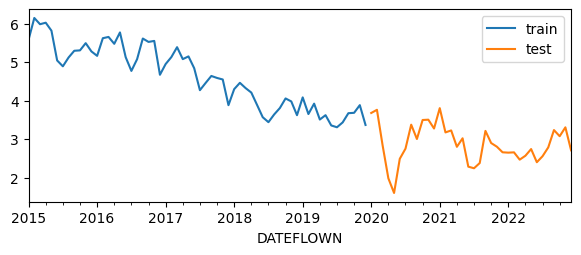

In [213]:
steps = 36
data_train = df1[:-steps]
data_test  = df1[-steps:]
print(
    f"Train dates : {data_train.index.min()} --- "
    f"{data_train.index.max()}  (n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- "
    f"{data_test.index.max()}  (n={len(data_test)})"
)

fig, ax = plt.subplots(figsize=(7, 2.5))
data_train['OVERALLSCORE'].plot(ax=ax, label='train')
data_test['OVERALLSCORE'].plot(ax=ax, label='test')
ax.legend();

In [195]:
from sklearn.neighbors import KNeighborsRegressor

In [196]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=42),
                 lags      = 15 #INICIALMENTE TENÍAS 6 LAGS
             )
forecaster.fit(y=data_train['OVERALLSCORE'])
forecaster

NameError: name 'ForecasterAutoreg' is not defined

In [684]:
steps = 36
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2020-01-01    3.660979
2020-02-01    3.514734
2020-03-01    3.626072
2020-04-01    3.464590
2020-05-01    3.474952
Freq: MS, Name: pred, dtype: float64

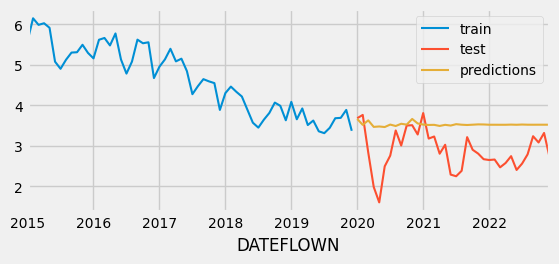

In [685]:
# Plot predictions versus test data
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 2.5))
data_train['OVERALLSCORE'].plot(ax=ax, label='train')
data_test['OVERALLSCORE'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

In [285]:
error_mse = mean_squared_error(
                y_true = data_test['OVERALLSCORE'],
                y_pred = predictions
            )
print(f"Test error (MSE): {error_mse}")

Test error (MSE): 0.8926679514873204


In [227]:
data=df0[df0.AIRLINENAME=="Qatar Airways"]

In [228]:
data.shape

(1739, 33)

In [229]:
data.DATEFLOWN.max()

Timestamp('2023-05-01 00:00:00')

In [230]:
data = data[(data.DATEFLOWN >= '2018-01-01 00:00:00') & (data.DATEFLOWN < '2023-01-01 00:00:00')]

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44.6313
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.2091
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.5665
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7847
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3174 
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.2596
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.8184
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.5695
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0327
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5241
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.6971
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.3783
Epoch 13/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.6269
Epoch 14/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.9889
Epoch 15/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss

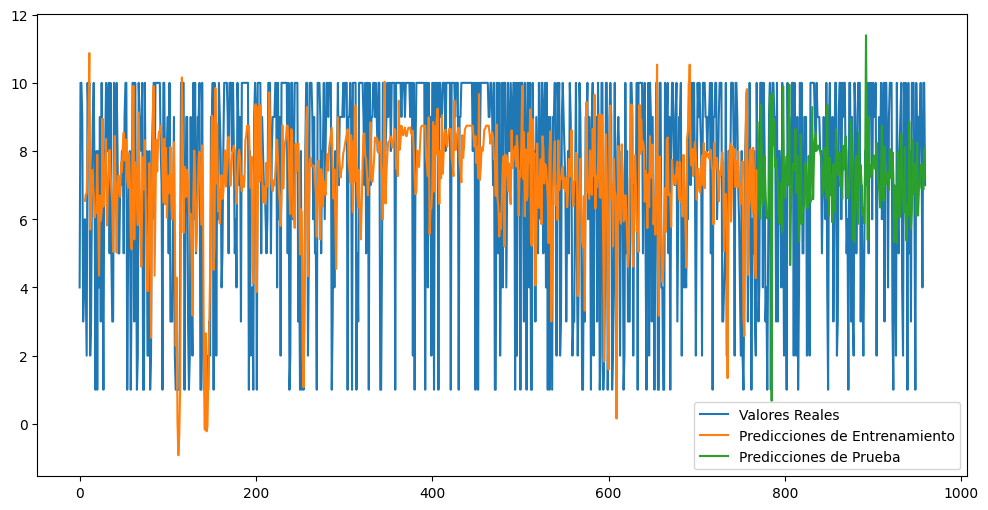

Error cuadrático medio en entrenamiento: 7.832282724267047
Error cuadrático medio en prueba: 9.467729695590466


In [232]:

# Cargar el conjunto de datos de OverallScore
values = data['OVERALLSCORE'].values

# Preprocesamiento
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

sequence_length = 6 #10 MESES
X, y = create_sequences(values, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Redimensionar para LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=200, verbose=1)

# Predicción
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.plot(range(len(values)), values, label='Valores Reales')
plt.plot(range(sequence_length, train_size + sequence_length), train_predictions, label='Predicciones de Entrenamiento')
plt.plot(range(train_size + sequence_length, train_size + sequence_length + len(test_predictions)), test_predictions, label='Predicciones de Prueba')
plt.legend()
plt.show()

# Cálculo del error cuadrático medio (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Error cuadrático medio en entrenamiento: {train_mse}')
print(f'Error cuadrático medio en prueba: {test_mse}')


In [233]:
#do this for each of the most famous airlines (this has to be done by airline)

## CLUSTERING. Give a country and receive the best airlines, etc.

##### Unsupervised KMeans

In [119]:
from sklearn import datasets
from sklearn.metrics import classification_report

In [121]:
clustermodel=df0[["CABIN_TYPE", "TRAVELLER_TYPE", "OVERALLSCORE", "GROUNDSERVICERATING", "SEATCOMFORTRATING", "SERVICERATING", "SCALE_YN"]]
#same as for logit model above

In [122]:
clustermodel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89783 entries, 0 to 89988
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CABIN_TYPE           89783 non-null  object 
 1   TRAVELLER_TYPE       89783 non-null  object 
 2   OVERALLSCORE         89783 non-null  float64
 3   GROUNDSERVICERATING  89783 non-null  int64  
 4   SEATCOMFORTRATING    89783 non-null  int64  
 5   SERVICERATING        89783 non-null  int64  
 6   SCALE_YN             89783 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 5.1+ MB


In [123]:
clustermodel["CABIN_TYPE"]=clustermodel["CABIN_TYPE"].astype(str).astype(int)
clustermodel["TRAVELLER_TYPE"]=clustermodel["CABIN_TYPE"].astype(str).astype(int)

In [124]:
clustermodel


,CABIN_TYPE,TRAVELLER_TYPE,OVERALLSCORE,GROUNDSERVICERATING,SEATCOMFORTRATING,SERVICERATING,SCALE_YN
0,1,1,9.0,4,4,5,0
1,1,1,1.0,1,2,2,0
2,1,1,1.0,1,2,1,0
3,1,1,2.0,1,1,3,0
4,1,1,9.0,5,4,4,0
...,...,...,...,...,...,...,...
89984,1,1,8.0,2,1,1,0
89985,1,1,1.0,1,1,2,0
89986,1,1,1.0,2,2,1,0
89987,1,1,1.0,1,2,2,0


In [125]:
y = clustermodel["TRAVELLER_TYPE"]


In [126]:
clustermodel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89783 entries, 0 to 89988
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CABIN_TYPE           89783 non-null  int32  
 1   TRAVELLER_TYPE       89783 non-null  int32  
 2   OVERALLSCORE         89783 non-null  float64
 3   GROUNDSERVICERATING  89783 non-null  int64  
 4   SEATCOMFORTRATING    89783 non-null  int64  
 5   SERVICERATING        89783 non-null  int64  
 6   SCALE_YN             89783 non-null  int32  
dtypes: float64(1), int32(3), int64(3)
memory usage: 4.5 MB


In [127]:
X = clustermodel.drop('TRAVELLER_TYPE', axis=1)

X.head()

,CABIN_TYPE,OVERALLSCORE,GROUNDSERVICERATING,SEATCOMFORTRATING,SERVICERATING,SCALE_YN
0,1,9.0,4,4,5,0
1,1,1.0,1,2,2,0
2,1,1.0,1,2,1,0
3,1,2.0,1,1,3,0
4,1,9.0,5,4,4,0


In [128]:
y.value_counts()

TRAVELLER_TYPE
1    74386
3    10450
2     3344
4     1603
Name: count, dtype: int64

In [129]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_scaled).head()

,0,1,2,3,4,5
0,-0.432886,1.459335,1.008967,0.990754,1.345569,-0.598557
1,-0.432886,-0.869516,-0.824614,-0.294692,-0.406161,-0.598557
2,-0.432886,-0.869516,-0.824614,-0.294692,-0.990071,-0.598557
3,-0.432886,-0.578409,-0.824614,-0.937416,0.177749,-0.598557
4,-0.432886,1.459335,1.620161,0.990754,0.761659,-0.598557


In [135]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42) #hemos decidido 8 porque sí. Luego lo mejoramos.
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [136]:
clusters = kmeans.predict(X_scaled)
clusters

array([1, 0, 0, ..., 0, 0, 0])

In [137]:
pd.Series(clusters).value_counts().sort_index()

0    40387
1    23950
2    10406
3    15040
Name: count, dtype: int64

In [138]:
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()
#esto es importante!

,CABIN_TYPE,OVERALLSCORE,GROUNDSERVICERATING,SEATCOMFORTRATING,SERVICERATING,SCALE_YN,cluster
0,1,9.0,4,4,5,0,1
1,1,1.0,1,2,2,0,0
2,1,1.0,1,2,1,0,0
3,1,2.0,1,1,3,0,0
4,1,9.0,5,4,4,0,1


In [139]:
print(classification_report(y, clusters))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.95      0.31      0.46     74386
           2       0.03      0.09      0.04      3344
           3       0.06      0.08      0.07     10450
           4       0.00      0.00      0.00      1603

    accuracy                           0.27     89783
   macro avg       0.21      0.09      0.11     89783
weighted avg       0.80      0.27      0.39     89783



In [115]:
kmeans.inertia_

90826.20863201692

In [140]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

inertia

[291282.4688999432,
 236632.51852164054,
 182231.2361601772,
 158578.8804849643,
 136822.6301685473,
 127458.31878038352,
 105934.99063053014,
 97824.70747477529,
 103545.55321573623,
 85291.54127559101,
 79976.91060065542,
 76202.81425538463,
 73723.37940607862,
 70872.00584052464,
 67128.7113887697,
 65238.321885316116,
 63780.68075290321,
 62041.88602618636]

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

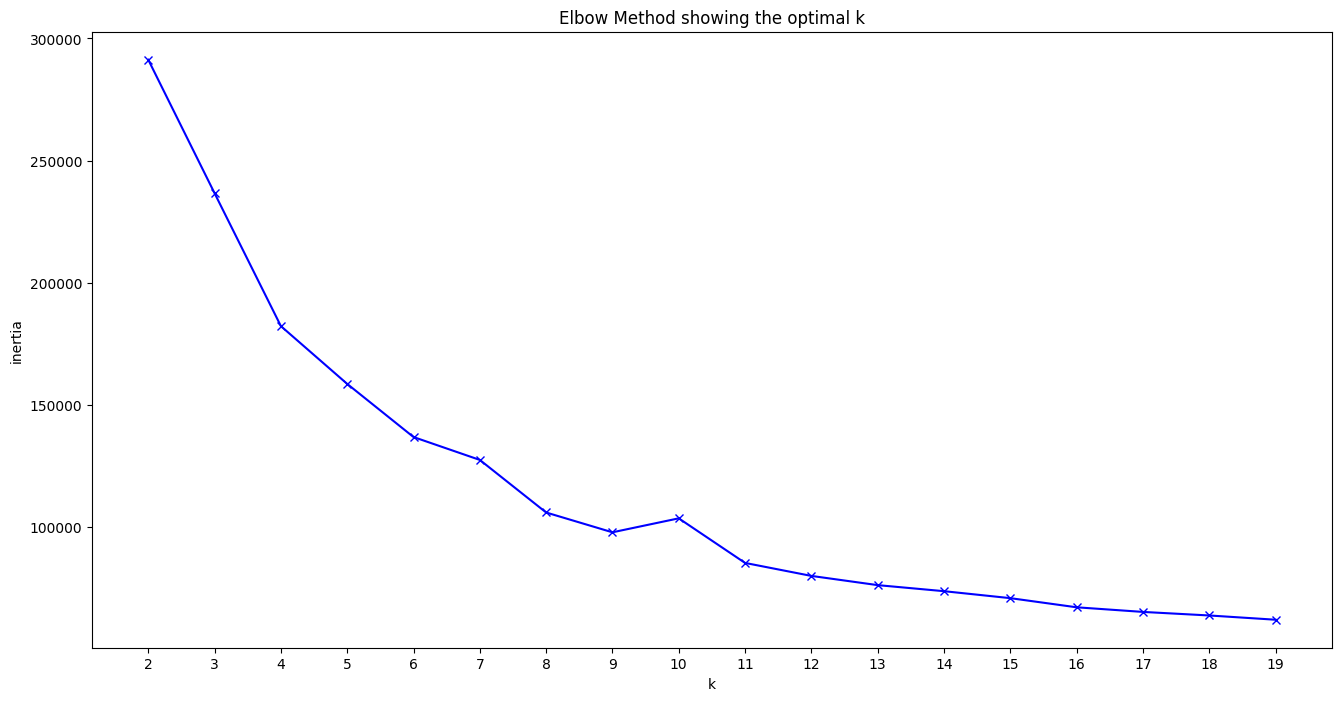

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [142]:
from sklearn.metrics import silhouette_score
K = range(2, 10)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Transform the data into 2D so we can see
pca = PCA(2)
X_2D = pca.fit_transform(X_scaled) #el PCA es una transformación de los datos
X_2D

https://tenor.com/es/view/rabbids-terrorism-jorts-jet-engine-rabbids-go-home-gif-19797468

https://tenor.com/es/view/plane-fall-falling-sit-scared-gif-11782294